In [28]:
import pandas as pd
import numpy as np
# Load the data
# data = pd.read_csv('TEST')
# data = pd.read_csv('events_HK_processed_18.csv')
data = pd.read_csv('events_HK_2015_2020_test.csv')
# Display the first few rows of the dataframe
data.head()

,country_code_encoded_index,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,NumMentions,Contains14sub,Contains14,country_code_encoded,Year,Month,DayOfMonth
0,0,2015-02-19,141,3,-6.5,-3.543307,1,1,1,0,0,2015,2,19
1,0,2015-02-20,141,3,-6.5,-3.543307,1,1,1,0,0,2015,2,20
2,0,2015-02-21,141,3,-6.5,-2.558272,10,10,1,0,0,2015,2,21
3,0,2015-02-22,141,3,-6.5,-8.896797,10,10,1,0,0,2015,2,22
4,0,2015-02-23,141,3,-6.5,-8.160237,10,10,1,0,0,2015,2,23


In [29]:
# data = data.drop(columns=['Contains14sub', 'ActionGeo_CountryCode', 'EventCode'])
# data.rename(columns={'Contains14': 'lag_fut_Contains14 1'}, inplace=True)
# # data['AvgTone'].value_counts()

In [30]:
data = data.drop(columns=['Contains14sub', 'EventCode', 'country_code_encoded_index', 'country_code_encoded', 'Year', 'Month', 'DayOfMonth','SQLDATE'])
data.rename(columns={'Contains14': 'lag_fut_Contains14 1'}, inplace=True)
# # data['AvgTone'].value_counts()

In [31]:
data.value_counts('lag_fut_Contains14 1')

lag_fut_Contains14 1
0    1720
1      57
dtype: int64

In [32]:
#  define a window in the future to predict
Days_in_future = 2

In [33]:


target_name = 'will_be_1_anytime_next_'+str(Days_in_future)+'_days'
# Create a rolling window of 7 days and check if there's any 1 in 'lag_fut_Contains14 1' column within this window
data[target_name] = data['lag_fut_Contains14 1'].rolling(window=Days_in_future, min_periods=1).apply(lambda x: 1 if x.sum() > 0 else 0)

# Shift the 'will_be_1_anytime_next_week' column up by 1 place
data[target_name] = data[target_name].shift(-1)

# Replace NaN values with 0
# data[target_name].fillna(0, inplace=True)
data.dropna(inplace=True)


# Convert the new column to integers
data[target_name] = data[target_name].astype(int)

# Display the first few rows of the dataframe
data.head(10)

,QuadClass,GoldsteinScale,AvgTone,NumArticles,NumMentions,lag_fut_Contains14 1,will_be_1_anytime_next_2_days
0,3,-6.5,-3.543307,1,1,0,0
1,3,-6.5,-3.543307,1,1,0,0
2,3,-6.5,-2.558272,10,10,0,0
3,3,-6.5,-8.896797,10,10,0,0
4,3,-6.5,-8.160237,10,10,0,0
5,3,-6.5,0.471698,8,8,0,0
6,3,-6.5,0.155521,10,10,0,0
7,3,-6.5,-0.838574,2,2,0,0
8,3,-6.5,-9.756098,3,3,0,0
9,3,-6.5,-9.756098,3,3,0,0


In [34]:
# plt.scatter(data.index,data['lag_fut_Contains14 1'])

In [35]:
# Define lookback and buffer window
#  Units are number of days
window_gap = 0
lookback = 10


In [36]:
# def rolling(df, lookback_lag_target, roll_range):
#     df_lag = df.copy()
#     # Create lagged features
#     for lag in lookback_lag_target:
#         df_lag[f'lag_{lag}'] = df_lag[target_name].shift(lag)
#         # df[f'lagGoldstein_{lag}'] = df['GoldsteinScale'].shift(lag)
#         # df[f'lagAvgTone_{lag}'] = df['AvgTone'].shift(lag)
#         # df[f'lagAvgTone_{9}'] = df['AvgTone'].shift(9)
#         # df[f'lagNumArticles_{lag}'] = df['NumArticles'].shift(lag)
#         # df[f'lagNumMentions_{lag}'] = df['NumMentions'].shift(lag)
#         # df[f'lagQuadClass_{lag}'] = df['QuadClass'].shift(lag)
# #     drop columns that refer to same day data
    
#     columns_to_drop = ['GoldsteinScale', 'AvgTone', 'NumArticles', 'NumMentions', 'QuadClass', 'lag_fut_Contains14 1']
#     df_removed=df_lag.copy()
#     df_removed = df_removed.drop(columns_to_drop, axis=1)
#     df = df_removed.copy() 
#     # roll_range = [1]  # Specify the desired lookback periods

#     roll_mean_features = pd.DataFrame()
#     roll_mean_features['will_be_1_anytime_next_week_lag'] = df_removed[target_name].shift(window_gap+1)
#     roll_mean_features = [roll_mean_features['will_be_1_anytime_next_week_lag'].rolling(roll).mean() for roll in roll_range]
#     roll_mean_columns = [f'roll_mean_{roll}' for roll in roll_range]
#     roll_mean_df = pd.concat(roll_mean_features, axis=1)
#     roll_mean_df.columns = roll_mean_columns

#     df = pd.concat([df, roll_mean_df], axis=1)
    
# #      # Compute EMA
# #     ema_features = pd.DataFrame()
# #     ema_features['will_be_1_anytime_next_week_lag'] = df_removed[target_name].shift(min(lookback_lag_target))
# #     ema_features = [ema_features['will_be_1_anytime_next_week_lag'].ewm(span=roll).mean() for roll in roll_range]
# #     ema_columns = [f'ema_{roll}' for roll in roll_range]
# #     ema_df = pd.concat(ema_features, axis=1)
# #     ema_df.columns = ema_columns
    
# #     df = pd.concat([df, ema_df], axis=1)
    
#     # Add Fourier terms
# #     t = np.arange(len(df))
# #     frequencies = {
# #         'bi_weekly': 1/14,
# #         'weekly': 1/7,
# #         # 'monthly': 1/30,
# #         # 'yearly': 1/365
# #     }
    
# #     for cycle, freq in frequencies.items():
# #         df[f'Fourier_{cycle}_sin'] = np.sin(2 * np.pi * freq * t)
# #         df[f'Fourier_{cycle}_cos'] = np.cos(2 * np.pi * freq * t)

#     return df


# lookback_lag_target = range(window_gap+1,lookback+1)
# roll_range = range(window_gap+1,lookback-1)
# data_temp=data.copy()
# data_process = rolling(data_temp, lookback_lag_target, roll_range)
# data_process.dropna(inplace=True)

In [37]:
def rolling(df, lookback_lag_target, roll_range):
    df_lag = df.copy()
    # Create lagged features
    for lag in lookback_lag_target:
        df_lag[f'lag_{lag}'] = df_lag[target_name].shift(lag)
        # df_lag[f'lag_Goldstein_{lag}'] = df_lag['GoldsteinScale'].shift(lag)
        # df[f'lagAvgTone_{lag}'] = df['AvgTone'].shift(lag)
        # df[f'lagAvgTone_{9}'] = df['AvgTone'].shift(9)
        # df[f'lagNumArticles_{lag}'] = df['NumArticles'].shift(lag)
        # df[f'lagNumMentions_{lag}'] = df['NumMentions'].shift(lag)
        # df[f'lagQuadClass_{lag}'] = df['QuadClass'].shift(lag)
#     drop columns that refer to same day data
    
    columns_to_drop = ['GoldsteinScale', 'AvgTone', 'NumArticles', 'NumMentions', 'QuadClass', 'lag_fut_Contains14 1']
    df_removed=df_lag.copy()
    df_removed = df_removed.drop(columns_to_drop, axis=1)
    df = df_removed.copy()
    # roll_range = [1]  # Specify the desired lookback periods

    roll_mean_features = pd.DataFrame()
    roll_mean_features['will_be_1_anytime_next_week_lag'] = df_removed[target_name].shift(window_gap + 1)
    roll_mean_features = [roll_mean_features['will_be_1_anytime_next_week_lag'].rolling(roll).mean() for roll in roll_range]
    roll_mean_columns = [f'roll_mean_{roll}' for roll in roll_range]
    roll_mean_df = pd.concat(roll_mean_features, axis=1)
    roll_mean_df.columns = roll_mean_columns

    df = pd.concat([df_removed, roll_mean_df], axis=1)
    
    # df['rolling_mean'] = [df[target_name].shift(1).rolling(window=roll).mean() for roll in roll_range]
    
#     roll_mean_features = pd.DataFrame()
#     roll_mean_features['rolling_mean'] = [df_removed[target_name].shift(window_gap + 1).rolling(window=roll).mean() for roll in roll_range]
#     # roll_mean_features['will_be_1_anytime_next_week_lag'] = df_removed[target_name].shift(min(lookback_lag_target))
#     # roll_mean_features = [roll_mean_features['will_be_1_anytime_next_week_lag'].rolling(roll).mean() for roll in roll_range]
#     roll_mean_columns = [f'roll_mean_{roll}' for roll in roll_range]
#     roll_mean_df = pd.concat(roll_mean_features, axis=1)
#     roll_mean_df.columns = roll_mean_columns

#     df = pd.concat([df_removed, roll_mean_df], axis=1)
    # df = df.drop('roll_mean_1', axis=1)

    return df


lookback_lag_target = range(window_gap+1,lookback+1)
roll_range = range(window_gap+1,lookback)
data_temp=data.copy()
data_process = rolling(data_temp, lookback_lag_target, roll_range)
data_process.dropna(inplace=True)

In [38]:
data_process.head()

,will_be_1_anytime_next_2_days,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,roll_mean_1,roll_mean_2,roll_mean_3,roll_mean_4,roll_mean_5,roll_mean_6,roll_mean_7,roll_mean_8,roll_mean_9
10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
imbalance_ratio = data_process[target_name].value_counts()[0]/data_process[target_name].value_counts()[1]
print(imbalance_ratio)

17.78723404255319


In [40]:
def create_train_test_sequences_ordered(data, seq_length=20, target_column=None, test_size=0.3):
    """
    Create training and testing sequences from the data while maintaining the temporal order.
    
    Parameters:
    - data: DataFrame containing the data
    - seq_length: Length of the sequences
    - target_column: Name of the target column
    - test_size: Proportion of the dataset to include in the test split
    
    Returns:
    - X_train, X_test, y_train, y_test
    """
    
    if not target_column:
        raise ValueError("Target column must be specified.")
    
    # Get all features except target column
    features = [col for col in data.columns if col != target_column]
    
    num_data = len(data) - seq_length + 1
    num_features = len(features)
    
    X, y = [], []
    
    for i in range(num_data):
        seq = data[features].iloc[i:i+seq_length].values
        target = data[target_column].iloc[i+seq_length-1]
        
        X.append(seq)
        y.append(target)
        
#     split_index = int(len(X) * (1 - test_size))
    
#     X_train, X_test = X[:split_index], X[split_index:]
#     y_train, y_test = y[:split_index], y[split_index:]
    
    return np.array(X), np.array(y)


# Get training and testing sequences while maintaining the temporal order
X, y = create_train_test_sequences_ordered(data_process, seq_length=20, target_column=target_name)
X.shape, y.shape


((1747, 20, 19), (1747,))

In [41]:

# Determine the split index
train_size = int(0.7 * len(X))

# Split the data
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1222, 20, 19), (525, 20, 19), (1222,), (525,))

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim

# Check if CUDA is available and set our device to GPU if it is
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert data to PyTorch tensors (assuming X_train, y_train, X_test, y_test are already defined)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

# Assuming the sequence length is equal to the number of time steps in each sample
seq_length = X_train_tensor.shape[1]

## LSTM

In [43]:


class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1, num_layers=1):
        super(LSTMModel, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)

        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)

    def init_hidden(self):
        # Initialize hidden state and cell state
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).to(device),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).to(device))

    def forward(self, x):
        # Forward pass through LSTM layer
        # lstm_out, self.hidden = self.lstm(x.view(len(x), seq_length, -1))
        lstm_out, self.hidden = self.lstm(x.view(x.shape[0], seq_length, -1))
        
        # Only take the output from the final timestep
        y_pred = self.linear(lstm_out[:, -1, :])
        return y_pred

# Define hyperparameters
input_dim = X_train_tensor.shape[2]  # number of features
hidden_dim = 256
batch_size = 32  # we will use batch size of 1 for simplicity
output_dim = 1
num_layers = 2

# Initialize the model, loss function, and optimizer
model = LSTMModel(input_dim, hidden_dim, batch_size, output_dim, num_layers)
model = model.to(device)
imbalance_ratio = imbalance_ratio

criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([imbalance_ratio]).to(device))
# criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)




In [124]:
torch.onnx.export(model, X_train_tensor, 'iris.onnx', input_names=["features"], output_names=["output"])

/opt/conda/lib/python3.10/site-packages/torch/onnx/symbolic_opset9.py:4315: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/onnx/_internal/jit_utils.py:258: UserWarning: The shape inference of prim::Constant type is missing, so it may result in wrong shape inference for the exported graph. Please consider adding it in symbolic function. (Triggered internally at ../torch/csrc/jit/passes/onnx/shape_type_inference.cpp:1884.)
  _C._jit_pass_onnx_node_shape_type_inference(node, params_dict, opset_version)
/opt/conda/lib/python3.10/site-packages/torch/onnx/utils.py:687: UserWarning: The shape inference of prim::Constant type is missing, so it may result in wrong shape inference for the ex

## CNN-LSTM

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ConvLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1, num_layers=1):
        super(ConvLSTMModel, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=64, kernel_size=3, padding=1)
        self.batch_norm1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.1)

        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.batch_norm2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.1)
        
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.batch_norm3 = nn.BatchNorm1d(256)
        self.dropout3 = nn.Dropout(0.1)

        self.pool = nn.MaxPool1d(kernel_size=1)

        # Define the LSTM layer
        # self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)
        self.lstm = nn.LSTM(128, self.hidden_dim, self.num_layers)
        # self.lstm = nn.LSTM(256, self.hidden_dim, self.num_layers)
        # self.lstm = nn.LSTM(64, self.hidden_dim, self.num_layers, dropout=0.2 if num_layers > 1 else 0)
        # self.lstm = nn.LSTM(64, self.hidden_dim, self.num_layers)
        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)

    def init_hidden(self):
        # Initialize hidden state and cell state
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).to(device),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).to(device))

    def forward(self, x):
        # Forward pass through CNN layers
        x = self.conv1(x)
        # x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.pool(x)

        x = self.conv2(x)
        # x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.pool(x)
        
        # x = self.conv3(x)
        # # x = self.batch_norm3(x)
        # x = self.relu(x)
        # x = self.dropout3(x)
        # x = self.pool(x)
        

        # Calculate new sequence length for LSTM
        seq_length = x.shape[2]

        # Forward pass through LSTM layer
        # lstm_out, self.hidden = self.lstm(x.view(len(x), seq_length, -1))
        lstm_out, self.hidden = self.lstm(x.view(x.shape[0], seq_length, -1))

        # Only take the output from the final timestep
        y_pred = self.linear(lstm_out[:, -1, :])
        return y_pred

# Define hyperparameters
input_dim = X_train_tensor.shape[1]  # number of channels
hidden_dim = 256
batch_size = 32
output_dim = 1
num_layers = 2

# Initialize the model, loss function, and optimizer
model = ConvLSTMModel(input_dim, hidden_dim, batch_size, output_dim, num_layers)
model = model.to(device)
imbalance_ratio = imbalance_ratio

criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([imbalance_ratio]).to(device))
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [110]:
torch.onnx.export(model, X_train_tensor, 'iris.onnx', input_names=["features"], output_names=["output"])

/opt/conda/lib/python3.10/site-packages/torch/onnx/symbolic_opset9.py:4315: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/onnx/_internal/jit_utils.py:258: UserWarning: The shape inference of prim::Constant type is missing, so it may result in wrong shape inference for the exported graph. Please consider adding it in symbolic function. (Triggered internally at ../torch/csrc/jit/passes/onnx/shape_type_inference.cpp:1884.)
  _C._jit_pass_onnx_node_shape_type_inference(node, params_dict, opset_version)
/opt/conda/lib/python3.10/site-packages/torch/onnx/utils.py:687: UserWarning: The shape inference of prim::Constant type is missing, so it may result in wrong shape inference for the ex

## BIDIRECTIONAL

In [61]:
class BidirectLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1, num_layers=1):
        super(ConvLSTMModel, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=64, kernel_size=7, padding=1)
        self.batch_norm1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.1)
        
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=7, padding=1)
        self.batch_norm2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.1)
        
        self.pool = nn.MaxPool1d(kernel_size=2)

        # Define the LSTM layer with bidirectionality
        self.lstm = nn.LSTM(128, self.hidden_dim, self.num_layers, 
                            dropout=0.2 if num_layers > 1 else 0, bidirectional=True)

        # Adjust the input size for the linear layer to account for bidirectionality
        self.linear = nn.Linear(2 * self.hidden_dim, output_dim)

    def init_hidden(self):
        # Adjust the initialization for bidirectional hidden states
        return (torch.zeros(2 * self.num_layers, self.batch_size, self.hidden_dim).to(device),
                torch.zeros(2 * self.num_layers, self.batch_size, self.hidden_dim).to(device))

    def forward(self, x):
        # Forward pass through CNN layers
        x = self.conv1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.pool(x)

        # Forward pass through LSTM layer
        lstm_out, self.hidden = self.lstm(x.view(len(x), seq_length, -1))
        
        # Only take the output from the final timestep
        # Remember to concatenate the outputs from both directions
        y_pred = self.linear(torch.cat((lstm_out[:, -1, :self.hidden_dim], 
                                        lstm_out[:, 0, self.hidden_dim:]), 1))
        return y_pred

        # Define hyperparameters
input_dim = X_train_tensor.shape[2]  # number of features
hidden_dim = 256
batch_size = 32  # we will use batch size of 1 for simplicity
output_dim = 1
num_layers = 2

# Initialize the model, loss function, and optimizer
model = BidirectLSTMModel(input_dim, hidden_dim, batch_size, output_dim, num_layers)
model = model.to(device)
imbalance_ratio = 8

criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([imbalance_ratio]).to(device))
optimizer = optim.Adam(model.parameters(), lr=0.001)


TypeError: super(type, obj): obj must be an instance or subtype of type

## Training and test

In [45]:
from sklearn.metrics import f1_score, confusion_matrix
def compute_f1(model, X, y_true):
    with torch.no_grad():
        y_pred = model(X)
        y_pred_binary = (torch.sigmoid(y_pred).cpu().numpy() > 0.5).astype(int)
        cm = confusion_matrix(y_true, y_pred_binary)
    return f1_score(y_true, y_pred_binary), cm

# Retrain the model and compute f1 scores every 10 epochs
num_epochs = 300
f1_train_scores = []
f1_test_scores = []

for epoch in range(num_epochs):
    model.train()
    # model.hidden = model.init_hidden()
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(X_train_tensor)
    
    # Calculate loss
    loss = criterion(y_pred.view(-1), y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Compute f1 scores every 10 epochs
    if (epoch) % 20 == 0:
        f1_train, _ = compute_f1(model, X_train_tensor, y_train)
        f1_test, cm = compute_f1(model, X_test_tensor, y_test)
        print(epoch, f1_test, f1_train, cm)
        f1_train_scores.append(f1_train)
        
        f1_test_scores.append(f1_test)
        


0 0.2912621359223301 0.43171806167400884 [[437  59]
 [ 14  15]]
20 0.4210526315789473 0.5308641975308641 [[465  31]
 [ 13  16]]
40 0.30303030303030304 0.4433497536945813 [[441  55]
 [ 14  15]]
60 0.3409090909090909 0.5082872928176795 [[452  44]
 [ 14  15]]
80 0.2479338842975207 0.40322580645161293 [[419  77]
 [ 14  15]]
100 0.28888888888888886 0.43720930232558136 [[448  48]
 [ 16  13]]
120 0.26153846153846155 0.3550724637681159 [[412  84]
 [ 12  17]]
140 0.36585365853658536 0.4972375690607735 [[458  38]
 [ 14  15]]
160 0.30952380952380953 0.5 [[454  42]
 [ 16  13]]
180 0.25242718446601947 0.44545454545454544 [[435  61]
 [ 16  13]]
200 0.17567567567567566 0.3249299719887955 [[390 106]
 [ 16  13]]
220 0.3157894736842105 0.4577114427860697 [[445  51]
 [ 14  15]]
240 0.29545454545454547 0.505263157894737 [[450  46]
 [ 16  13]]
260 0.21052631578947367 0.4482758620689655 [[423  73]
 [ 17  12]]
280 0.2650602409638554 0.547486033519553 [[453  43]
 [ 18  11]]


In [35]:
import matplotlib.pyplot as plt
# y_test.cpu()
# y_pred = y_pred.cpu()
adjusted_date_range = pd.date_range(start='2020/11/21', periods=y_test.size, freq='D')


if isinstance(y_test, np.ndarray):
    true_values = y_test
else:
    true_values = y_test.detach().numpy()

if isinstance(y_pred, np.ndarray):
    predicted_values = y_pred
else:
    predicted_values = y_pred.detach().numpy()

df = pd.DataFrame({'True': true_values, 'Predicted': predicted_values})



# Update the dataframe to use the adjusted_date_range as its index
# df = pd.DataFrame({'True': y_test.detach().numpy(), 'Predicted': y_pred.detach().numpy()})

# df = pd.DataFrame({'True': y_test, 'Predicted': y_pred})
# Add a new 'Date' column to the dataframe with the adjusted_date_range values
df['Date'] = adjusted_date_range

# Filter for instances where y_test is 1
# df_filtered = df[df['True'] == 1]
df_filtered = df




# Scatter plot using the 'Date' column for the x-axis
plt.figure(figsize=(15,7))
plt.scatter(df_filtered['Date'], df_filtered['True'], label='True', s=50)
plt.scatter(df_filtered['Date'], df_filtered['Predicted'], label='Predicted', s=50, marker='x', alpha=0.7)
plt.title('Scatter plot of Instances where True Value is 1')
plt.ylabel('Value')
plt.xlabel('Date')
plt.yticks([0,1])
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
plt.savefig('')


ValueError: Per-column arrays must each be 1-dimensional

Permutation Importance for LSTM:
The steps are as follows:

Record the performance of the model with the original data (e.g., F1 score).

For each feature:
a. Permute the values of this feature across all samples.
b. Record the performance of the model with this permuted data.
c. The importance of this feature is the difference between the original performance and the permuted performance.

Rank features based on their importance.

In [28]:
import matplotlib.pyplot as plt

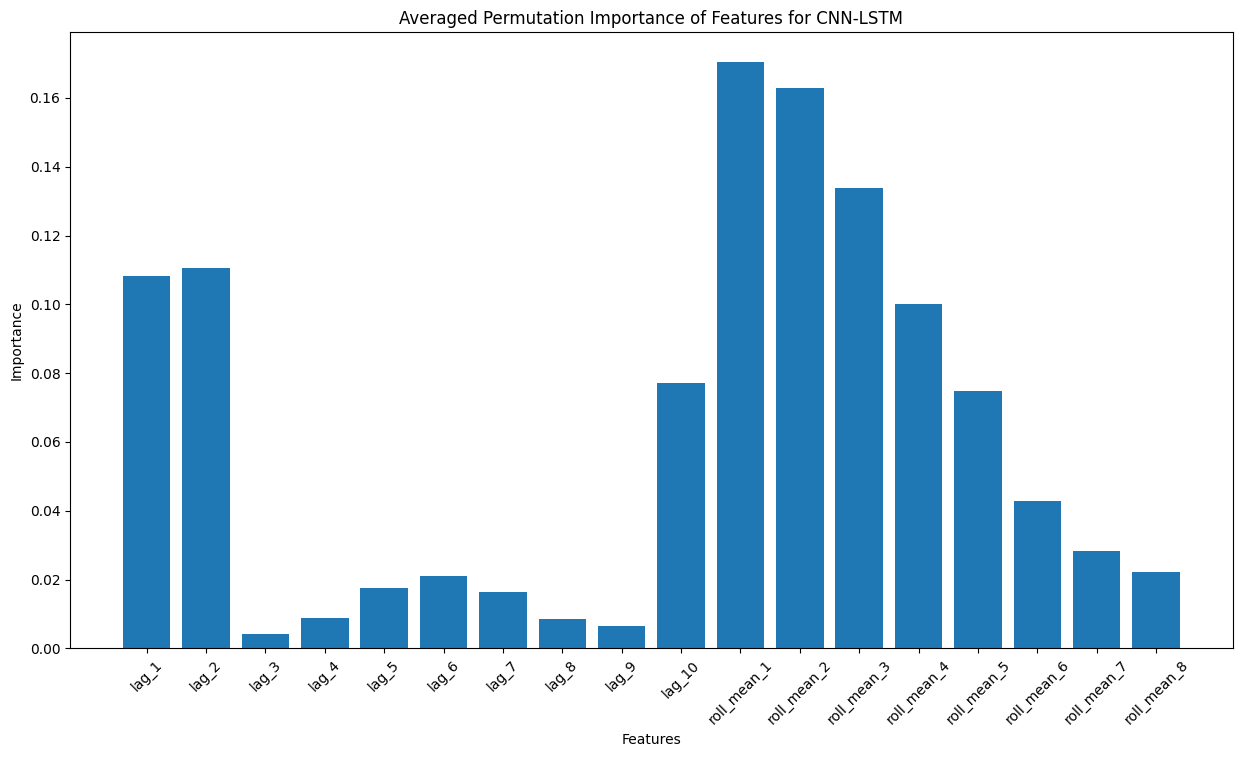

In [49]:
def averaged_permutation_importance(model, X, y_true, metric, n_repeats=30):
    """
    Compute averaged permutation importance for features in X using multiple permutations.
    
    Parameters:
    - model: trained LSTM model
    - X: input data (tensor)
    - y_true: true labels
    - metric: function to compute performance metric
    - n_repeats: number of times to repeat the permutation process for each feature
    
    Returns:
    - importances: array of averaged importances for each feature
    """
    # Convert tensors to numpy for permutation
    X_np = X.cpu().numpy()
    y_true_np = y_true.cpu().numpy()
    
    # Compute original metric
    original_score, _ = metric(model, X, y_true_np)
    
    # Placeholder for importances
    importances = np.zeros(X_np.shape[2])
    
    # Compute permutation importance
    for i in range(X_np.shape[2]):
        importance_accumulator = 0
        for _ in range(n_repeats):
            X_permuted = X_np.copy()
            np.random.shuffle(X_permuted[:,:,i])
            X_permuted_tensor = torch.tensor(X_permuted).to(device)
            score_permuted, _ = metric(model, X_permuted_tensor, y_true_np)
            importance_accumulator += original_score - score_permuted
        # Average the accumulated importances
        importances[i] = importance_accumulator / n_repeats
    
    return importances

# Assuming target_name is defined and is the name of the target variable in data_process
# Exclude target_name from the DataFrame to get feature names
feature_names = data_process.drop(columns=[target_name]).columns.tolist()

# Compute averaged permutation importances for the trained model using the test data
avg_importances = averaged_permutation_importance(model, X_test_tensor, y_test_tensor, compute_f1)

# Plot the averaged importances
plt.figure(figsize=(15, 8))
plt.bar(range(len(avg_importances)), avg_importances)
plt.xlabel('Features')
plt.xticks(range(len(avg_importances)), feature_names, rotation=45)
plt.ylabel('Importance')
plt.title('Averaged Permutation Importance of Features for CNN-LSTM')
plt.savefig('CNN_LSTM_feature_final')
plt.show()


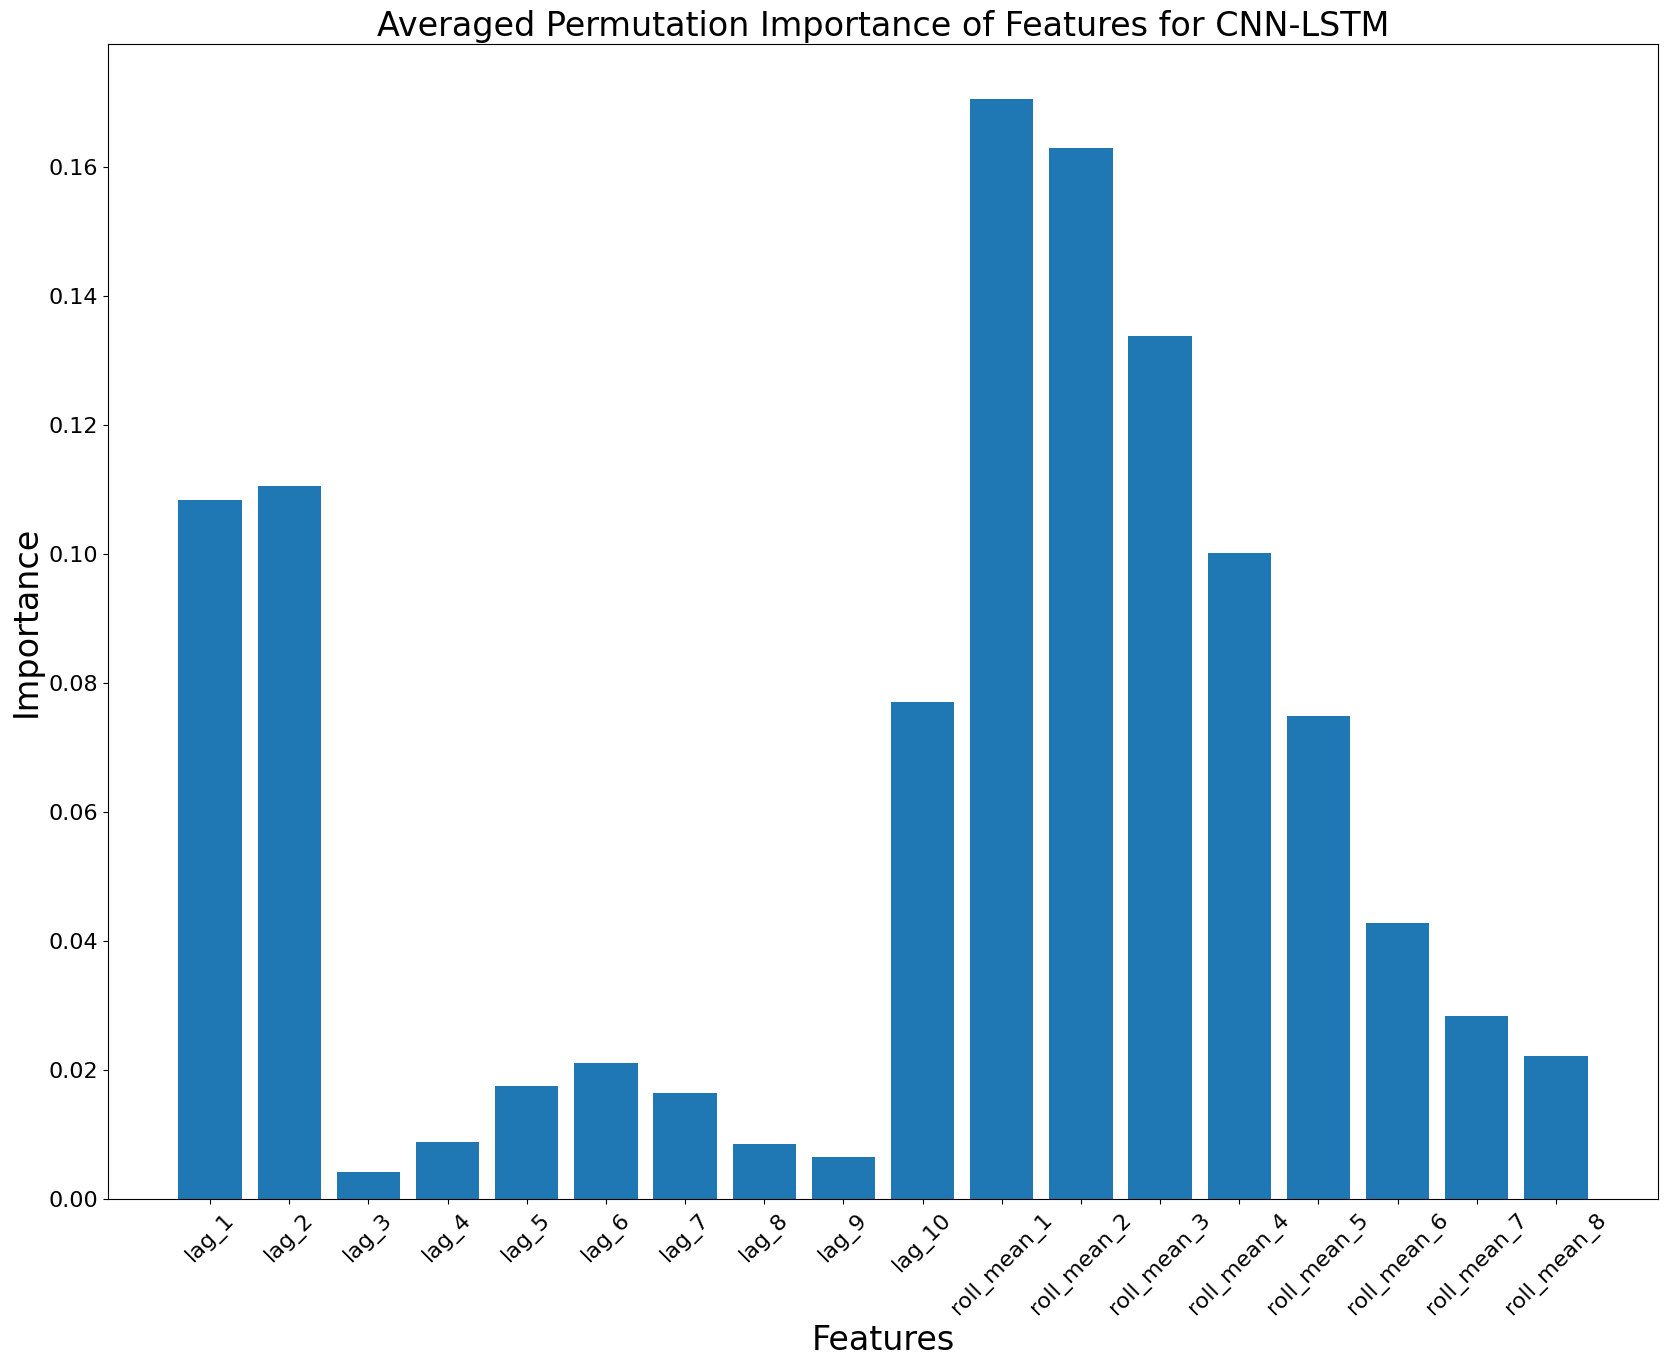

In [50]:
# Plot the averaged importances
plt.figure(figsize=(20, 15))
plt.bar(range(len(avg_importances)), avg_importances)
plt.xlabel('Features',fontsize=24)
plt.xticks(range(len(avg_importances)), feature_names, rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Importance',fontsize=24)
plt.title('Averaged Permutation Importance of Features for CNN-LSTM', fontsize=24)
plt.savefig('CNN-LSTM_feature')
plt.show()


# Multi country model

In [27]:
Days_in_future = 1
window_gap = 0
lookback = 10
target_name = 'will_be_1_anytime_next_' + str(Days_in_future) + '_days'

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Load the CSV file into a DataFrame
data = pd.read_csv('events_FR_SP_AG_L_YM_processed.csv')

# 2. Rename the 'Contains14' column and drop the unnecessary columns
data.rename(columns={'Contains14': 'lag_fut_Contains14 1'}, inplace=True)
data.drop(columns=['EventCode', 'Contains14sub'], inplace=True)

# 3. Label encode the 'ActionGeo_CountryCode' column
le = LabelEncoder()
data['ActionGeo_CountryCode'] = le.fit_transform(data['ActionGeo_CountryCode'])

    
# 4. Define the processing function to apply on grouped data
def process_grouped_data(group_data):
    # Days_in_future = 2
    # target_name = 'will_be_1_anytime_next_' + str(Days_in_future) + '_days'
    
    # Create a rolling window and check if there's any 1 in 'lag_fut_Contains14 1' column within this window
    group_data[target_name] = group_data['lag_fut_Contains14 1'].rolling(window=Days_in_future, min_periods=1).apply(lambda x: 1 if x.sum() > 0 else 0)
    
    # Shift the target column up by 1 place
    group_data[target_name] = group_data[target_name].shift(-1)
    
    # Handle NaN values and then convert the new column to integers
    group_data[target_name].fillna(0, inplace=True)
    group_data[target_name] = group_data[target_name].astype(int)
    
    # Define lookback and buffer window
    # window_gap = 0
    # lookback = 10

    df_lag = group_data.copy()
    
    # Create lagged features
    lookback_lag_target = range(window_gap+1, lookback+1)
    for lag in lookback_lag_target:
        df_lag[f'lag_{lag}'] = df_lag[target_name].shift(lag)
    
    # Drop some columns
    columns_to_drop = ['GoldsteinScale', 'AvgTone', 'NumArticles', 'lag_fut_Contains14 1']
    df_removed = df_lag.drop(columns=columns_to_drop, axis=1)
    
    roll_range = range(window_gap+1, lookback-1)
    roll_mean_features = pd.DataFrame()
    roll_mean_features['will_be_1_anytime_next_week_lag'] = df_removed[target_name].shift(min(lookback_lag_target))
    roll_mean_features = [roll_mean_features['will_be_1_anytime_next_week_lag'].rolling(roll).mean() for roll in roll_range]
    
    roll_mean_columns = [f'roll_mean_{roll}' for roll in roll_range]
    roll_mean_df = pd.concat(roll_mean_features, axis=1)
    roll_mean_df.columns = roll_mean_columns

    df = pd.concat([df_removed, roll_mean_df], axis=1)
    
    # Remove rows with NaN values
    df.dropna(inplace=True)
    return df

# 5. Group by 'ActionGeo_CountryCode' and apply the processing function
grouped_data = data.groupby('ActionGeo_CountryCode').apply(process_grouped_data)

# 6. Reset the index for the final dataframe
grouped_data.reset_index(drop=True, inplace=True)
data_process = grouped_data.copy()

In [29]:
imbalance_ratio = data_process[target_name].value_counts()[0]/data_process[target_name].value_counts()[1]
print(imbalance_ratio)

38.3048433048433


In [30]:
import numpy as np
def create_train_test_sequences_ordered(data, seq_length=20, target_column=None, test_size=0.3):
    """
    Create training and testing sequences from the data while maintaining the temporal order.
    
    Parameters:
    - data: DataFrame containing the data
    - seq_length: Length of the sequences
    - target_column: Name of the target column
    - test_size: Proportion of the dataset to include in the test split
    
    Returns:
    - X_train, X_test, y_train, y_test
    """
    
    if not target_column:
        raise ValueError("Target column must be specified.")
    
    # Get all features except target column
    # features = [col for col in data.columns if col != target_column or 'ActionGeo_CountryCode' in col]
    features = [col for col in data.columns if 'lag_' in col or 'roll_' in col or 'ActionGeo_CountryCode' in col]
    
    num_data = len(data) - seq_length + 1
    num_features = len(features)
    
    X, y = [], []
    
    for i in range(num_data):
        seq = data[features].iloc[i:i+seq_length].values
        target = data[target_column].iloc[i+seq_length-1]
        
        X.append(seq)
        y.append(target)
        
#     split_index = int(len(X) * (1 - test_size))
    
#     X_train, X_test = X[:split_index], X[split_index:]
#     y_train, y_test = y[:split_index], y[split_index:]
    
    return np.array(X), np.array(y)


# Get training and testing sequences while maintaining the temporal order
X, y = create_train_test_sequences_ordered(data_process, seq_length=20, target_column=target_name)
X.shape, y.shape


((13777, 20, 19), (13777,))

In [31]:

# Determine the split index
train_size = int(0.7 * len(X))

# Split the data
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((9643, 20, 19), (4134, 20, 19), (9643,), (4134,))

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim

# Check if CUDA is available and set our device to GPU if it is
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert data to PyTorch tensors (assuming X_train, y_train, X_test, y_test are already defined)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

# Assuming the sequence length is equal to the number of time steps in each sample
seq_length = X_train_tensor.shape[1]

## LSTM

In [33]:


class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1, num_layers=1):
        super(LSTMModel, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)

        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)

    def init_hidden(self):
        # Initialize hidden state and cell state
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).to(device),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).to(device))

    def forward(self, x):
        # Forward pass through LSTM layer
        # lstm_out, self.hidden = self.lstm(x.view(len(x), seq_length, -1))
        lstm_out, self.hidden = self.lstm(x.view(x.shape[0], seq_length, -1))
        
        # Only take the output from the final timestep
        y_pred = self.linear(lstm_out[:, -1, :])
        return y_pred

# Define hyperparameters
input_dim = X_train_tensor.shape[2]  # number of features
hidden_dim = 256
batch_size = 32  # we will use batch size of 1 for simplicity
output_dim = 1
num_layers = 2

# Initialize the model, loss function, and optimizer
model = LSTMModel(input_dim, hidden_dim, batch_size, output_dim, num_layers)
model = model.to(device)
imbalance_ratio = imbalance_ratio

criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([imbalance_ratio]).to(device))
# criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)




## Training and test

In [34]:
from sklearn.metrics import f1_score, confusion_matrix
def compute_f1(model, X, y_true):
    with torch.no_grad():
        y_pred = model(X)
        y_pred_binary = (torch.sigmoid(y_pred).cpu().numpy() > 0.5).astype(int)
        cm = confusion_matrix(y_true, y_pred_binary)
    return f1_score(y_true, y_pred_binary), cm

# Retrain the model and compute f1 scores every 10 epochs
num_epochs = 1000
f1_train_scores = []
f1_test_scores = []

for epoch in range(num_epochs):
    model.train()
    # model.hidden = model.init_hidden()
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(X_train_tensor)
    
    # Calculate loss
    loss = criterion(y_pred.view(-1), y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Compute f1 scores every 10 epochs
    if (epoch) % 20 == 0:
        f1_train, _ = compute_f1(model, X_train_tensor, y_train)
        f1_test, cm = compute_f1(model, X_test_tensor, y_test)
        print(epoch, f1_test, f1_train, cm)
        f1_train_scores.append(f1_train)
        
        f1_test_scores.append(f1_test)
        


0 0.03283369022127052 0.05663039097138251 [[   0 4065]
 [   0   69]]
20 0.03283369022127052 0.05664180608748236 [[   0 4065]
 [   0   69]]
40 0.03283369022127052 0.05684887459807074 [[   0 4065]
 [   0   69]]
60 0.03283369022127052 0.05675047965263052 [[   0 4065]
 [   0   69]]
80 0.032857142857142856 0.05984814649397052 [[   3 4062]
 [   0   69]]
100 0.031788079470198675 0.05968664511315593 [[ 419 3646]
 [   9   60]]
120 0.03241830065359477 0.061912792098289565 [[ 371 3694]
 [   7   62]]
140 0.03362734288864388 0.06484873151539818 [[ 567 3498]
 [   8   61]]
160 0.03623473808586058 0.06735889243876464 [[1641 2424]
 [  23   46]]
180 0.03292826342610742 0.07095283403561235 [[1625 2440]
 [  27   42]]


KeyboardInterrupt: 